# Exploratory Analysis of Cell-type Specific Networks in Pancreatic Islets in R

**Authorship:**
Author, *11/22/2021*
***
**Description:**
Notebook to do some cool stuff
***
**TODOs:**
 - <font color='red'> Read in each samples and quantify cell types
***

## Set-up

In [30]:
# Set-up reticulate for running Python in R, takes about 10s
Sys.setenv(RETICULATE_PYTHON="/cellar/users/aklie/opt/miniconda3/envs/Renv/bin/python")
library(reticulate)
reticulate::use_python("/cellar/users/aklie/opt/miniconda3/envs/Renv/bin/python")
reticulate::use_condaenv("/cellar/users/aklie/opt/miniconda3/envs/Renv")
reticulate::py_module_available(module='leidenalg') #needs to be TRUE
reticulate::import('leidenalg') #good to make sure this doesn't error

[1] TRUE

Module(leidenalg)

In [31]:
# Load libraries, takes between 20s and 1 min
suppressMessages(library(hdf5r))
suppressMessages(library(loomR))
suppressMessages(library(Seurat))
suppressMessages(library(SeuratDisk))
suppressMessages(library(SeuratData))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(harmony))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
warnLevel <- getOption('warn')
options(warn = -1)
set.seed(1234)

# Set-up multithreading
library(future)
plan("multicore", workers = 2)
options(future.globals.maxSize = 50 * 1024 ^ 3)

In [53]:
sample <- "R207"
wd <- sprintf(sample)  # Working directory
print(sprintf("Loading from %s", file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)), sample))
adata <- readRDS(file = file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)))

[1] "Loading from indv_sample_networks/R207.indv.linked.rds"


In [ ]:
adata

In [73]:
sample <- "R221"
wd <- sprintf(sample)  # Working directory
print(sprintf("Loading from %s", file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)), sample))
adata.2 <- readRDS(file = file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)))

[1] "Loading from indv_sample_networks/R221.indv.linked.rds"


In [74]:
combined <- merge(
    x = adata,
    y = list(adata.2),
    add.cell.ids = c("R207", "R221")
)
combined[["ATAC"]]


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows



ChromatinAssay data with 139541 features for 15013 cells
Variable features: 0 
Genome: hg38 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 2 

In [75]:
combined

An object of class Seurat 
360105 features across 15013 samples within 4 assays 
Active assay: peaks (159072 features, 0 variable features)
 3 other assays present: RNA, ATAC, SCT

In [ ]:
frags.R207 <- CreateFragmentObject(
  path = "R207/atac_fragments.tsv.gz",
  cells = rownames(R207)
)

In [79]:
Idents(combined) <- combined@meta.data$predicted.id

In [85]:
head(combined@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,⋯,prediction.score.endothelial,prediction.score.activated_stellate,prediction.score.schwann,prediction.score.mast,prediction.score.macrophage,prediction.score.epsilon,prediction.score.quiescent_stellate,prediction.score.max,nCount_peaks,nFeature_peaks
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
R207_AAACAGCCAAACGGGC-1,R207,7427,2715,0.7001481,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,ACAGCGGGTAGGTGAC-1,1,0,27518,⋯,0,0,0,0,0,0,0,0.8861807,12467,9704
R207_AAACAGCCACAAAGAC-1,R207,5433,2464,1.2700166,AAACAGCCACAAAGAC-1,AAACAGCCACAAAGAC-1,ACAGCGGGTGACGTAA-1,1,0,20786,⋯,0,0,0,0,0,0,0,1.0000000,8779,6986
R207_AAACAGCCAGCAAGTG-1,R207,2663,1306,0.7510327,AAACAGCCAGCAAGTG-1,AAACAGCCAGCAAGTG-1,ACAGCGGGTCTAATCA-1,1,0,9908,⋯,0,0,0,0,0,0,0,0.9817979,2795,2416
R207_AAACAGCCAGGACCTT-1,R207,4902,2334,2.7947776,AAACAGCCAGGACCTT-1,AAACAGCCAGGACCTT-1,ACAGCGGGTTGCTCTC-1,1,0,20389,⋯,0,0,0,0,0,0,0,1.0000000,3431,3050
R207_AAACAGCCAGTTATCG-1,R207,5146,2453,0.2914885,AAACAGCCAGTTATCG-1,AAACAGCCAGTTATCG-1,ACAGCGGGTTTATTCC-1,1,0,18904,⋯,0,0,0,0,0,0,0,1.0000000,2467,2269
R207_AAACAGCCATAATCCG-1,R207,6171,2608,0.6806028,AAACAGCCATAATCCG-1,AAACAGCCATAATCCG-1,ACAGCGGGTGCTTTAA-1,1,0,22989,⋯,0,0,0,0,0,0,0,0.9302332,8998,7345


In [84]:
granges(combined)

GRanges object with 159072 ranges and 1 metadata column:
           seqnames            ranges strand |        revmap
              <Rle>         <IRanges>  <Rle> | <IntegerList>
       [1]     chr1        9920-10525      * |      131762,1
       [2]     chr1     102694-103027      * |        131763
       [3]     chr1     136610-136877      * |        131764
       [4]     chr1     180652-181608      * |      131765,2
       [5]     chr1     184037-184465      * |             3
       ...      ...               ...    ... .           ...
  [159068]     chrY 20575020-20576108      * |        250227
  [159069]     chrY 20990610-20991118      * |        250228
  [159070]     chrY 22373342-22373606      * |        250229
  [159071]     chrY 26670225-26671721      * |        250230
  [159072]     chrY 56685424-56685631      * |        250231
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

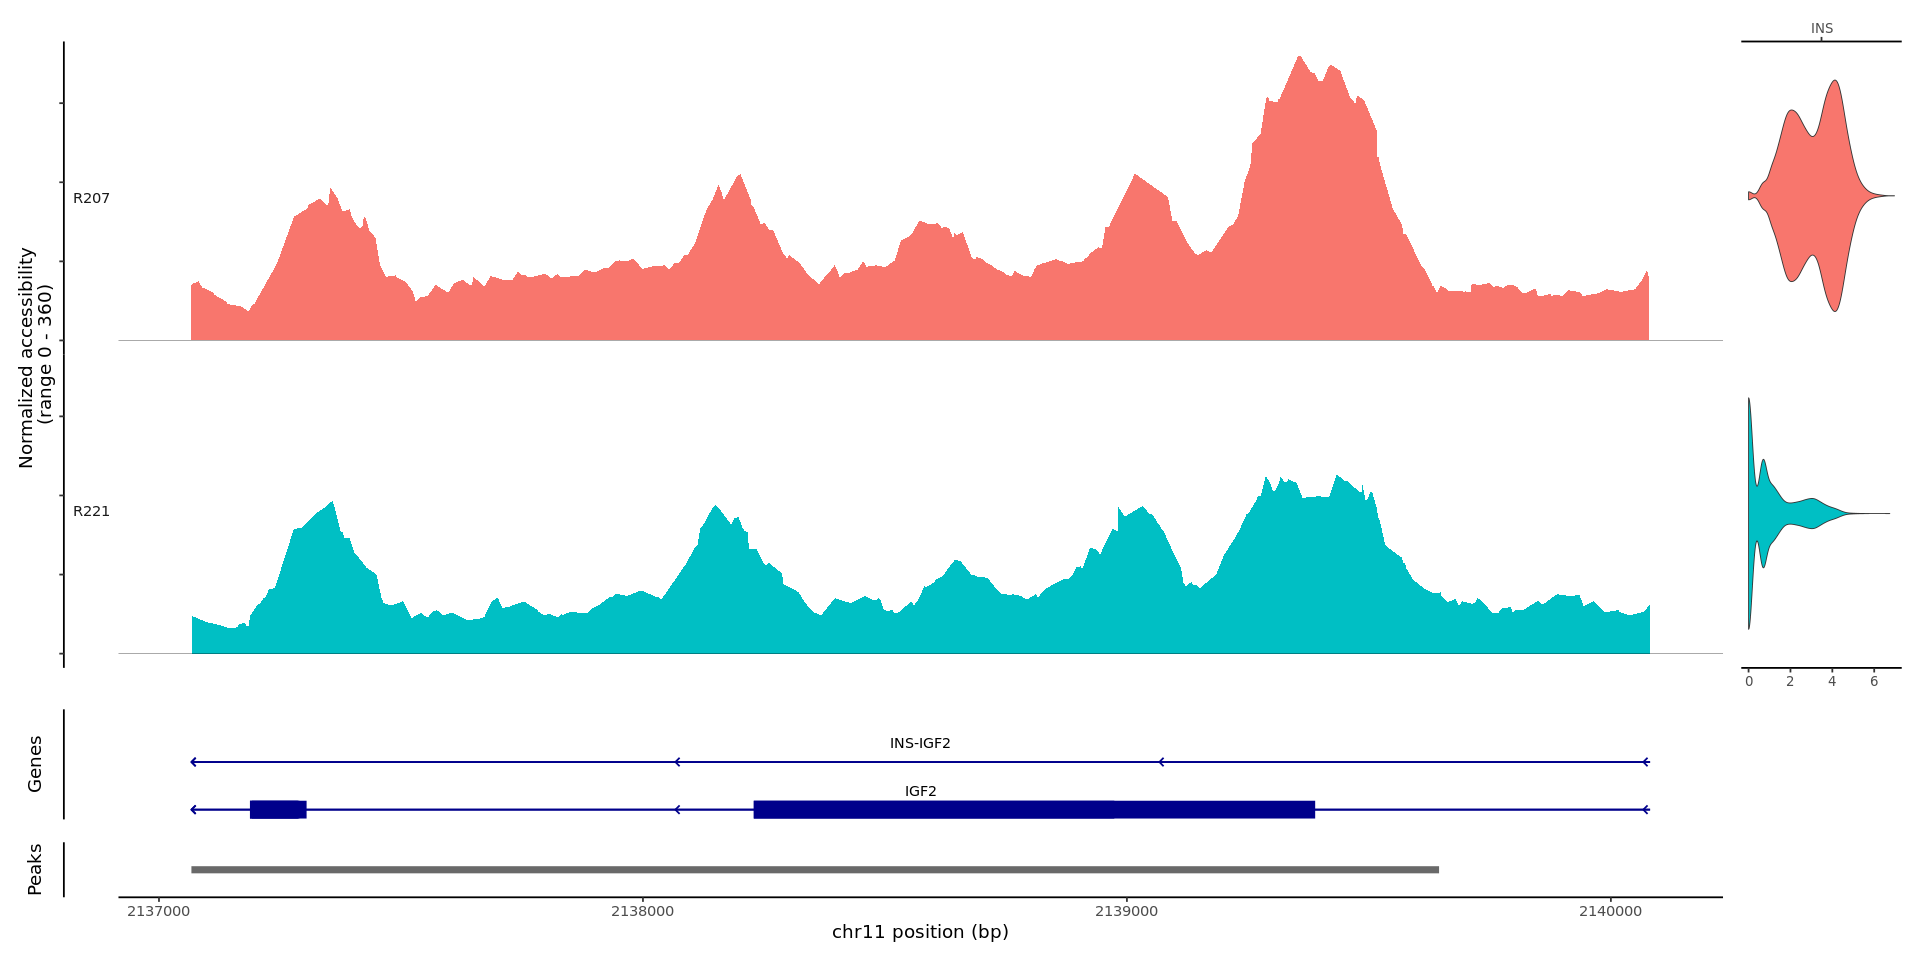

In [86]:
options(repr.plot.width=16, repr.plot.height=8)
CoveragePlot(
    object = combined,
    expression.assay = "SCT",
    group.by = 'orig.ident',
    region = c("chr11-2137067-2140081"),
    features = c("INS"),
)

# Load in regions of interest

In [54]:
rois = read.table("test.tsv", sep = "\t", header = 1)

In [55]:
linked.peaks <- rois$peak
chr.start.end <- unlist(strsplit(linked.peaks, "-"))
chr.start.end <- matrix(chr.start.end, length(chr.start.end)/3, 3, byrow = T)
seqs <- chr.start.end[, 1]
starts <- chr.start.end[, 2]
ends <- chr.start.end[, 3]
df <- data.frame(
    chr=seqs,
    start=starts,
    end=ends)

In [56]:
rois <- makeGRangesFromDataFrame(df)

# Create fragment objects

In [45]:
frags.R207 <- CreateFragmentObject(
  path = "R207/atac_fragments.tsv.gz",
  cells = rownames(R207)
)

Computing hash



ERROR: Error in CreateFragmentObject(path = "R207/atac_fragments.tsv.gz", cells = rownames(R207)): Not all cells requested could be found in the fragment file.


In [ ]:
counts.R207 <- FeatureMatrix(
  fragments = frags.R207,
  features = rois
  cells = rownames(R207))

# Visualize regions of interest across celltypes and samples

In [32]:
sample <- "R221"
wd <- sprintf(sample)  # Working directory
print(sprintf("Loading from %s", file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)), sample))
adata <- readRDS(file = file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)))

[1] "Loading from indv_sample_networks/R221.indv.linked.rds"


# Scratch
Place for old or testing code

In [100]:
sample <- 'R221'  # Sample identifier
R221.beta.sample <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-beta.rds", sample)))
R221.delta.sample <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-delta.rds", sample)))
R221.alpha.sample <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-alpha.rds", sample)))
#adata_interest <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-interest.rds", sample)))

In [99]:
sample <- 'R207'  # Sample identifier
R207.beta.sample <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-beta.rds", sample)))
R207.delta.sample <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-delta.rds", sample)))
R207.alpha.sample <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-alpha.rds", sample)))
#adata_interest <- readRDS(file = file.path("indv_sample_analysis", sprintf("%s.indv.analysis.celltype-interest.rds", sample)))

In [48]:
sample <- 'R221'
R221.alpha.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.alpha.links.csv", sample)))
R221.beta.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.beta.links.csv", sample)))
R221.delta.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.delta.links.csv", sample)))

In [49]:
sample <- 'R207'
R207.alpha.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.alpha.links.csv", sample)))
R207.beta.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.beta.links.csv", sample)))
R207.delta.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.delta.links.csv", sample)))

In [50]:
sample <- 'R223'
R223.alpha.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.alpha.links.csv", sample)))
R223.beta.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.beta.links.csv", sample)))
R223.delta.net <- read.csv(file.path("indv_sample_analysis", sprintf("%s.indv.delta.links.csv", sample)))

In [77]:
R223.delta.net[R223.delta.net$gene == "FRMD4A", ]

score,gene,peak,zscore,pvalue
<dbl>,<chr>,<chr>,<dbl>,<dbl>


In [76]:
R207.delta.net[R207.delta.net$gene == "FRMD4A", ]

,score,gene,peak,zscore,pvalue
,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1423,0.22766468,FRMD4A,chr10-14173567-14174515,5.343312,4.563172e-08
1424,0.10016889,FRMD4A,chr10-14498739-14499599,1.952403,2.544518e-02
1425,0.09285194,FRMD4A,chr10-14532228-14533695,1.669260,4.753296e-02
1426,0.13748733,FRMD4A,chr10-14647489-14648857,2.468290,6.788007e-03
1427,0.08867366,FRMD4A,chr10-14665165-14665844,1.985045,2.356971e-02
1428,0.11448526,FRMD4A,chr10-14837189-14839304,2.489272,6.400256e-03


In [75]:
R221.delta.net[R221.delta.net$gene == "FRMD4A", ]

score,gene,peak,zscore,pvalue
<dbl>,<chr>,<chr>,<dbl>,<dbl>


In [62]:
R207.delta.net[order(R207.delta.net$pvalue), ]

,score,gene,peak,zscore,pvalue
,<dbl>,<chr>,<chr>,<dbl>,<dbl>
758,0.3761918,MARCH1,chr4-164383020-164384559,7.586488,1.643466e-14
1372,0.3087349,SLC31A1,chr9-113215039-113215774,6.228359,2.356728e-10
1553,0.2172171,SLC18A2,chr10-117264049-117265708,6.030064,8.194713e-10
140,0.2921576,SLC25A44,chr1-156661352-156661580,5.762934,4.133217e-09
2130,0.2550157,SHISA9,chr16-12901386-12902254,5.454998,2.448672e-08
1778,0.2055228,ALDH1L2,chr12-105277780-105278301,5.422064,2.945739e-08
579,0.2641070,PLS1,chr3-142853144-142853684,5.408218,3.182753e-08
1423,0.2276647,FRMD4A,chr10-14173567-14174515,5.343312,4.563172e-08
2164,0.1885992,LINC01572,chr16-72989283-72990250,5.332859,4.833928e-08


In [45]:
R221.delta.net[order(R221.delta.net$pvalue), ]

ERROR: Error in eval(expr, envir, enclos): object 'R221.delta.net' not found


In [36]:
DefaultAssay(adata_interest) <- "peaks"

In [37]:
Links(adata_interest)

GRanges object with 0 ranges and 0 metadata columns:
   seqnames    ranges strand
      <Rle> <IRanges>  <Rle>
  -------
  seqinfo: no sequences

In [30]:
Links(alpha.sample)[Links(alpha.sample)$gene == "GCG"]

GRanges object with 11 ranges and 5 metadata columns:
       seqnames              ranges strand |      score        gene
          <Rle>           <IRanges>  <Rle> |  <numeric> <character>
   [1]     chr2 161708933-162152404      * |  0.1456069         GCG
   [2]     chr2 161844078-162152404      * |  0.1305708         GCG
   [3]     chr2 161845084-162152404      * |  0.1505481         GCG
   [4]     chr2 161905618-162152404      * |  0.1690738         GCG
   [5]     chr2 162073969-162152404      * |  0.1935783         GCG
   [6]     chr2 162091631-162152404      * |  0.2015312         GCG
   [7]     chr2 162152404-162172880      * |  0.1790207         GCG
   [8]     chr2 162152404-162212811      * |  0.1572523         GCG
   [9]     chr2 162152404-162337333      * |  0.0973920         GCG
  [10]     chr2 162152404-162478867      * | -0.0927967         GCG
  [11]     chr2 162152404-162574954      * | -0.0591658         GCG
                         peak    zscore     pvalue
           

In [43]:
Links(delta.sample)

GRanges object with 12 ranges and 5 metadata columns:
       seqnames              ranges strand |     score        gene
          <Rle>           <IRanges>  <Rle> | <numeric> <character>
   [1]     chr2     1870122-2331260      * | 0.1354614       MYT1L
   [2]     chr2     2331260-2464490      * | 0.2586783       MYT1L
   [3]     chr2     2331260-2527217      * | 0.2267298       MYT1L
   [4]     chr2     2331260-2665380      * | 0.2216228       MYT1L
   [5]     chr2 208265922-208359714      * | 0.0997752       PTH2R
   ...      ...                 ...    ... .       ...         ...
   [8]     chr8     6656487-6708357      * |  0.245892      AGPAT5
   [9]     chr8     6708357-6800857      * |  0.106496      AGPAT5
  [10]     chr8   31639386-31795164      * |  0.149081        NRG1
  [11]     chr8   31639386-31810962      * |  0.118424        NRG1
  [12]    chr11     2161341-2211401      * | -0.116206         INS
                         peak    zscore      pvalue
                  <char

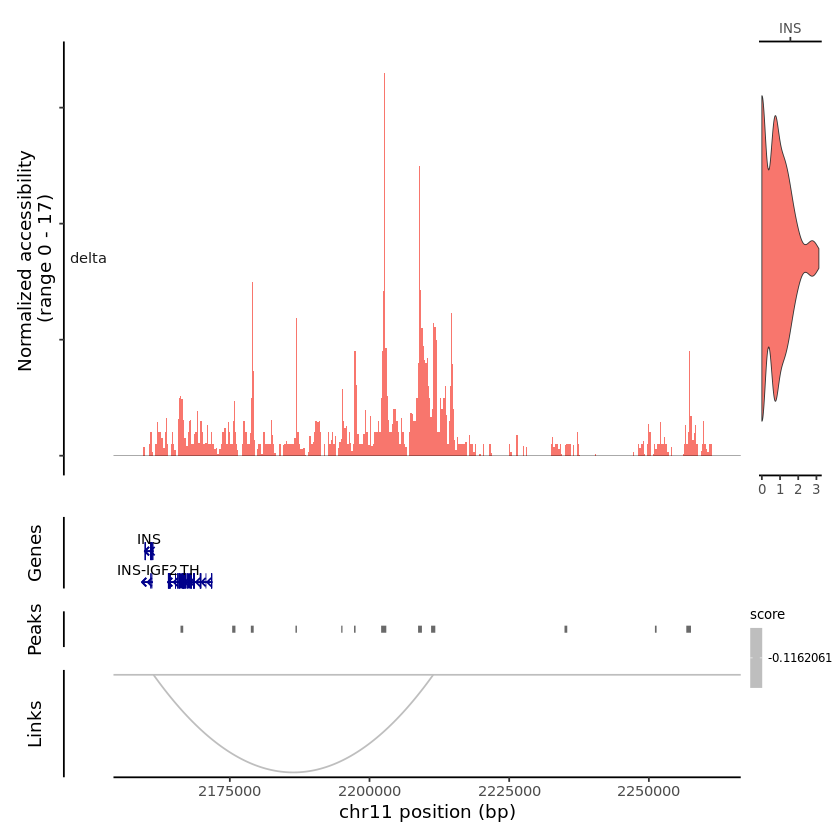

In [44]:
p1 <- CoveragePlot(
  object = delta.sample,
  region = "INS",
  features = "INS",
  expression.assay = "SCT",
  extend.upstream = 500,
  extend.downstream = 100000,
  links = TRUE
)
p1

## Part 2
Description

In [103]:
plan("multiprocess", workers = 4)
options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM

In [101]:
R207.alpha.sample

An object of class Seurat 
313174 features across 3072 samples within 5 assays 
Active assay: peaks (123857 features, 123857 variable features)
 4 other assays present: RNA, ATAC, SCT, GA
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [102]:
R221.alpha.sample

An object of class Seurat 
309606 features across 2339 samples within 5 assays 
Active assay: peaks (118729 features, 118729 variable features)
 4 other assays present: RNA, ATAC, SCT, GA
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [104]:
combined.peaks <- reduce(x = c(Links(R221.alpha.sample), Links(R207.alpha.sample)))

In [106]:
Links(R221.alpha.sample)

GRanges object with 3323 ranges and 5 metadata columns:
         seqnames              ranges strand |     score        gene
            <Rle>           <IRanges>  <Rle> | <numeric> <character>
     [1]     chr1     7667731-8026308      * | 0.0618845      ERRFI1
     [2]     chr1     7704594-8026308      * | 0.0771200      ERRFI1
     [3]     chr1     8012459-8026308      * | 0.0679098      ERRFI1
     [4]     chr1     8026308-8077292      * | 0.0535172      ERRFI1
     [5]     chr1     8026308-8162041      * | 0.0704260      ERRFI1
     ...      ...                 ...    ... .       ...         ...
  [3319]     chrX 150092718-150361422      * | 0.0777255      MAMLD1
  [3320]     chrX 150361422-150361638      * | 0.1113173      MAMLD1
  [3321]     chrX 150361422-150681083      * | 0.0754411      MAMLD1
  [3322]     chrY   14522638-14834549      * | 0.1571174      NLGN4Y
  [3323]     chrY   19077416-19232609      * | 0.0505998      TTTY14
                           peak    zscore     p

In [109]:
peakwidths <- width(combined.peaks)

In [110]:
combined.peaks <- combined.peaks[peakwidths  < 10000 & peakwidths > 20]
combined.peaks

GRanges object with 26 ranges and 0 metadata columns:
       seqnames              ranges strand
          <Rle>           <IRanges>  <Rle>
   [1]     chr1 226309097-226309869      *
   [2]     chr1 231626815-231627287      *
   [3]     chr2   55693391-55694975      *
   [4]     chr4   16898596-16898809      *
   [5]     chr4   20253260-20254367      *
   ...      ...                 ...    ...
  [22]    chr15   76059639-76059837      *
  [23]    chr15   83654086-83654111      *
  [24]    chr18     4455155-4455335      *
  [25]    chr18   12093853-12102198      *
  [26]     chrX   86148458-86148584      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

# Load in cell type data 
Description

In [23]:
sample <- "R221"
wd <- sprintf(sample)  # Working directory
print(sprintf("Loading from %s", file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)), sample))
adata <- readRDS(file = file.path("indv_sample_networks", sprintf("%s.indv.linked.rds", sample)))

[1] "Loading from indv_sample_networks/R221.indv.linked.rds"


In [24]:
granges(adata)[(start(granges(adata)) >= 179081268) & (end(granges(adata)) <= 179087997), ]

GRanges object with 3 ranges and 1 metadata column:
      seqnames              ranges strand |         peak_called_in
         <Rle>           <IRanges>  <Rle> |            <character>
  [1]     chr1 179081268-179083035      * | alpha,beta,acinar,du..
  [2]     chr1 179087601-179087997      * |             beta,alpha
  [3]     chr3 179082472-179082769      * |     delta,ductal,gamma
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [26]:
gr <- Links(adata)
gr[(start(gr) >= 179081268) & (end(gr) <= 179087997), ]

GRanges object with 0 ranges and 5 metadata columns:
   seqnames    ranges strand |     score        gene        peak    zscore
      <Rle> <IRanges>  <Rle> | <numeric> <character> <character> <numeric>
      pvalue
   <numeric>
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [27]:
gr[gr$gene == "ABL2", ]

GRanges object with 2 ranges and 5 metadata columns:
      seqnames              ranges strand |      score        gene
         <Rle>           <IRanges>  <Rle> |  <numeric> <character>
  [1]     chr1 179082152-179229684      * | -0.0772049        ABL2
  [2]     chr1 179087799-179229684      * | -0.0717847        ABL2
                        peak    zscore    pvalue
                 <character> <numeric> <numeric>
  [1] chr1-179081268-17908..  -1.78638 0.0370191
  [2] chr1-179087601-17908..  -1.93936 0.0262289
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [333]:
gr.peaks <- granges(adata)
num_peaks <- data.frame(unclass(table(gr.peaks$peak_called_in)))
colnames(num_peaks) <- "number_of_peaks"
print(sprintf("Saving celltypes to %s", file.path("indv_sample_networks", sprintf("%s.indv.num.peaks.csv",sample))))
write.csv(num_peaks, file.path("indv_sample_networks", sprintf("%s.indv.num.peaks.csv",sample)), row.names = TRUE)

[1] "Saving celltypes to indv_sample_networks/R207.indv.num.peaks.csv"


In [320]:
gr.links <- Links(adata)
linked.peaks <- gr.links$peak
chr.start.end <- unlist(strsplit(linked.peaks, "-"))
chr.start.end <- matrix(chr.start.end, length(chr.start.end)/3, 3, byrow = T)
seqs <- chr.start.end[, 1]
starts <- chr.start.end[, 2]
ends <- chr.start.end[, 3]
links.df <- data.frame(
    chr=seqs,
    start=starts,
    end=ends,
    strand=strand(gr.links),
    peak=gr.links$peak,
    gene=gr.links$gene,
    score=score(gr.links),
    zscore=gr.links$zscore,
    pvalue=gr.links$pvalue)

In [ ]:
gr.peaks <- granges(adata)
peaks.df <- data.frame(
    peak=paste0(seqnames(gr.peaks), "-", start(gr.peaks), "-", end(gr.peaks)),
    celltype=gr.peaks$peak_called_in)
annnotated.links <- merge(links.df, peaks.df, by="peak")

In [320]:
write.table(annnotated.links, 
            file=file.path("indv_sample_networks", sprintf("%s.indv.links.tsv", sample)),
            quote=F, sep="\t", row.names=F, col.names=T)

# Prelim motif analysis

# References